In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
data=pd.read_csv('health care diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Checking Null Values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

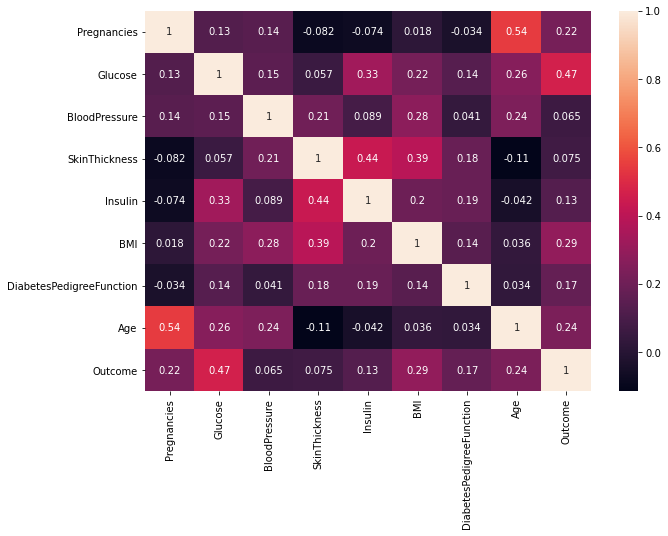

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

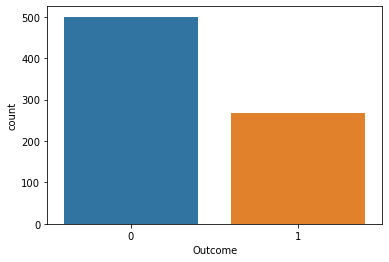

In [6]:
sns.countplot(data['Outcome'])

In [7]:
x=data.drop(['Outcome','BloodPressure','SkinThickness'],axis=1)
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [8]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.20,random_state=44)

In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())  
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))
  

print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 204
Before OverSampling, counts of label '0': 410 

After OverSampling, the shape of train_X: (820, 6)
After OverSampling, the shape of train_y: (820,) 

After OverSampling, counts of label '1': 410
After OverSampling, counts of label '0': 410


## LogisticRegression

In [11]:
logreg=LogisticRegression()

In [12]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression()

In [13]:
logreg_test_pred=logreg.predict(testx)
logreg_train_pred=logreg.predict(trainx)

In [14]:
print(accuracy_score(testy,logreg_test_pred))
print(accuracy_score(trainy,logreg_train_pred))

0.7922077922077922
0.737785016286645


In [15]:
confusion_matrix(testy,logreg_test_pred)

array([[77, 13],
       [19, 45]], dtype=int64)

In [16]:
print(classification_report(testy,logreg_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        90
           1       0.78      0.70      0.74        64

    accuracy                           0.79       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.79      0.79      0.79       154



## RandomForestClassifier

In [17]:
rf=RandomForestClassifier(random_state=70)

In [18]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(random_state=70)

In [19]:
rf_test_pred=rf.predict(testx)
rf_train_pred=rf.predict(trainx)

In [20]:
print(accuracy_score(testy,rf_test_pred))
print(accuracy_score(trainy,rf_train_pred))

0.8246753246753247
1.0


In [21]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [22]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [23]:
grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=70), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'max_samples': [2, 4, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 3],
                         'n_estimators': [100, 400, 200, 300]},
             verbose=2)

In [24]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'max_samples': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [25]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth=2,max_leaf_nodes=2,max_samples=3,min_samples_leaf= 1,
                               min_samples_split=3,n_estimators=400,random_state=46)

In [26]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=2, max_samples=3,
                       min_samples_split=3, n_estimators=400, random_state=46)

In [27]:
rf_grid_test_pred=rf_grid.predict(testx)
rf_grid_train_pred=rf_grid.predict(trainx)

In [28]:
print(accuracy_score(testy,rf_grid_test_pred))
print(accuracy_score(trainy,rf_grid_train_pred))

0.7987012987012987
0.7785016286644951


In [29]:
confusion_matrix(testy,rf_grid_test_pred)

array([[86,  4],
       [27, 37]], dtype=int64)

In [30]:
print(classification_report(testy,rf_grid_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        90
           1       0.90      0.58      0.70        64

    accuracy                           0.80       154
   macro avg       0.83      0.77      0.78       154
weighted avg       0.82      0.80      0.79       154



## DecisionTreeClassifier

In [31]:
dc=DecisionTreeClassifier(random_state=42)

In [32]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [33]:
dc_test_pred=dc.predict(testx)
dc_train_pred=dc.predict(trainx)

In [34]:
print(accuracy_score(testy,dc_test_pred))
print(accuracy_score(trainy,dc_train_pred))

0.7012987012987013
1.0


In [35]:
param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [36]:
dc_grid=GridSearchCV(estimator=dc,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [37]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [38]:
grid_dc=DecisionTreeClassifier(criterion= 'entropy', max_depth=1,max_leaf_nodes=2,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [39]:
grid_dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2,
                       random_state=42)

In [40]:
dc_test_pred=grid_dc.predict(testx)
dc_train_pred=grid_dc.predict(trainx)

In [41]:
print(accuracy_score(testy,dc_test_pred))
print(accuracy_score(trainy,dc_train_pred))

0.7337662337662337
0.737785016286645


## XGBClassifier

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb=XGBClassifier()

In [44]:
xgb.fit(trainx_res,trainy_res)

[18:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
xgb_test_pred=xgb.predict(testx)
xgb_train_pred=xgb.predict(trainx)

In [46]:
print(accuracy_score(testy,xgb_test_pred))
print(accuracy_score(trainy,xgb_train_pred))

0.7402597402597403
1.0


## Support Vector Machines

In [47]:
svc=SVC(random_state=42,probability=True)

In [48]:
svc.fit(trainx_res,trainy_res)

SVC(probability=True, random_state=42)

In [49]:
svc_test_pred=svc.predict(testx)
svc_train_pred=svc.predict(trainx)

In [50]:
print(accuracy_score(testy,svc_test_pred))
print(accuracy_score(trainy,svc_train_pred))

0.7727272727272727
0.7345276872964169
